<a href="https://colab.research.google.com/github/Tecindes/ClasificacionValidacion/blob/main/IAAumentada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


# Optimización Aeropuertaria


In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
datos= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flights.csv')
datos.shape

(71175, 11)

In [184]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [185]:
print(round(.205981*60)) # 70.20 70 minutos .20 segundos que deben convertirse es sobre 60 no sobre 10
print(round(.885071*60)) # 8.88 8 horas .88 minutos que deben convertirse es sobre 60 no sobre 10


12
53


In [186]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [187]:
datos.describe() # variables númericas

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [188]:
datos.describe(include='O') # variables categoricas

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [189]:
# para graficar
import seaborn as sns
import matplotlib.pyplot as plt


In [190]:
avg_delay=datos.groupby('airline')['delay'].mean()
avg_delay

,delay
airline,
BZ,3.077595
MM,40.498007
YE,25.772248


In [191]:
avg_delay=datos.groupby('airline')['delay'].mean().reset_index()
avg_delay

,airline,delay
0,BZ,3.077595
1,MM,40.498007
2,YE,25.772248


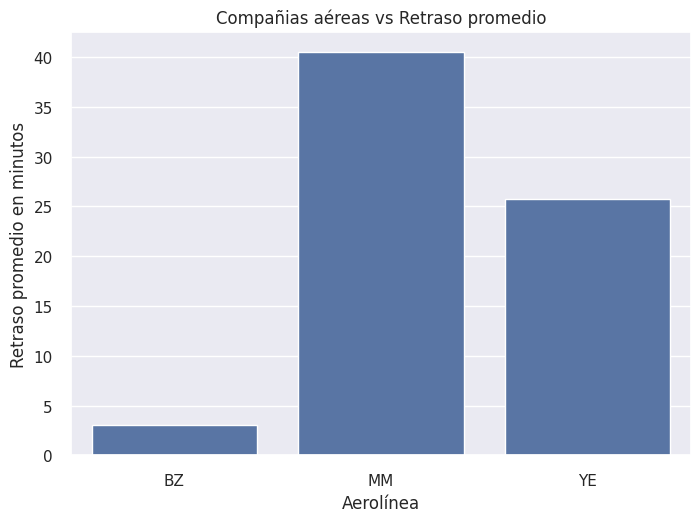

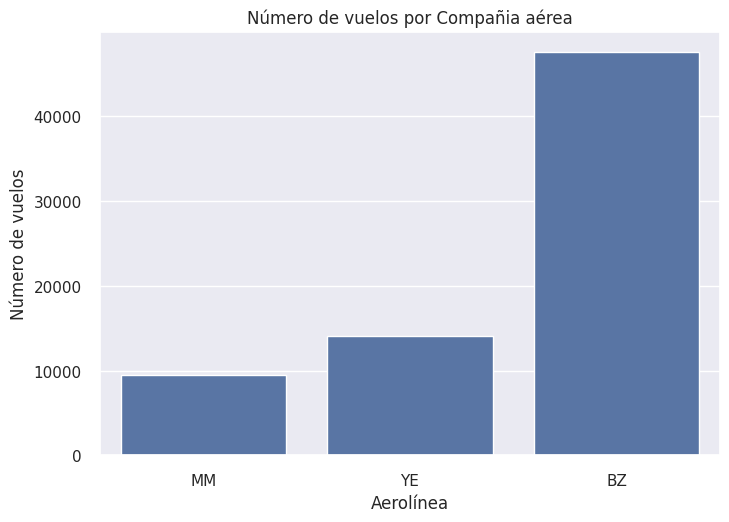

In [192]:
sns.barplot(x='airline',y='delay',data=avg_delay)
plt.title('Compañias aéreas vs Retraso promedio')
plt.xlabel('Aerolínea')
plt.ylabel('Retraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='airline')
plt.title('Número de vuelos por Compañia aérea')
plt.xlabel('Aerolínea')
plt.ylabel('Número de vuelos')
plt.show()

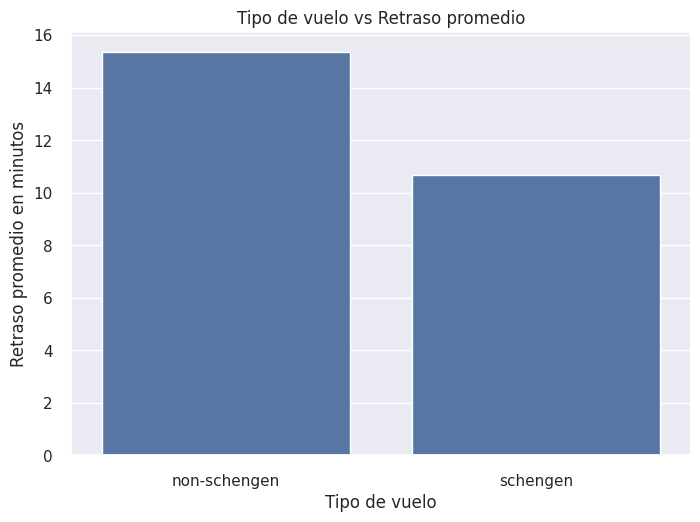

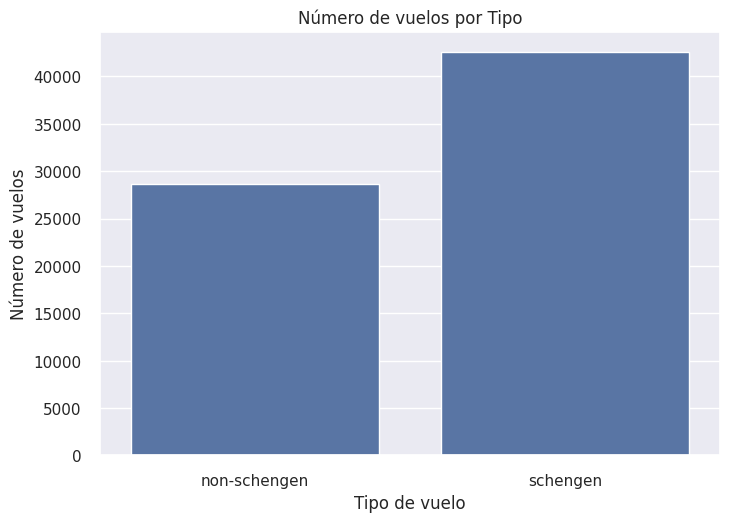

In [193]:
avg_delay=datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen',y='delay',data=avg_delay)
plt.title('Tipo de vuelo vs Retraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Retraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

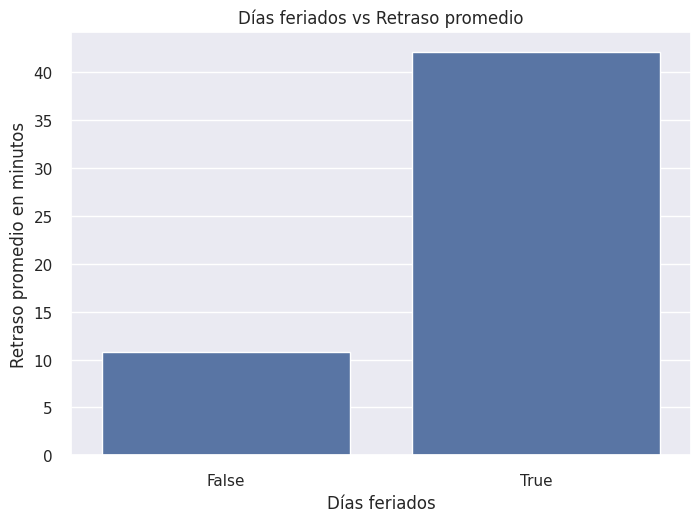

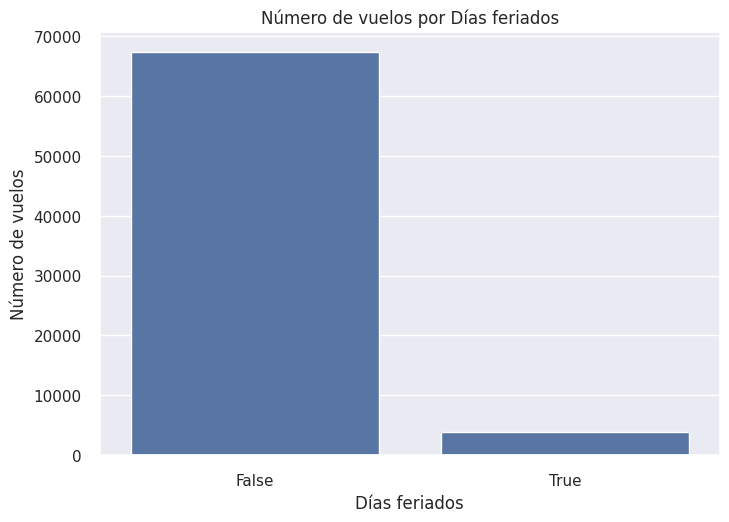

In [194]:
avg_delay=datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday',y='delay',data=avg_delay)
plt.title('Días feriados vs Retraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Retraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='is_holiday')
plt.title('Número de vuelos por Días feriados')
plt.xlabel('Días feriados')
plt.ylabel('Número de vuelos')
plt.show()

In [195]:
datos['aircraft_type'].value_counts()

,count
aircraft_type,
Airbus A320,30778
Airbus A330,16654
Boeing 787,9606
Embraer E175,7098
Boeing 737,4722
Boeing 777,2317


In [196]:
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

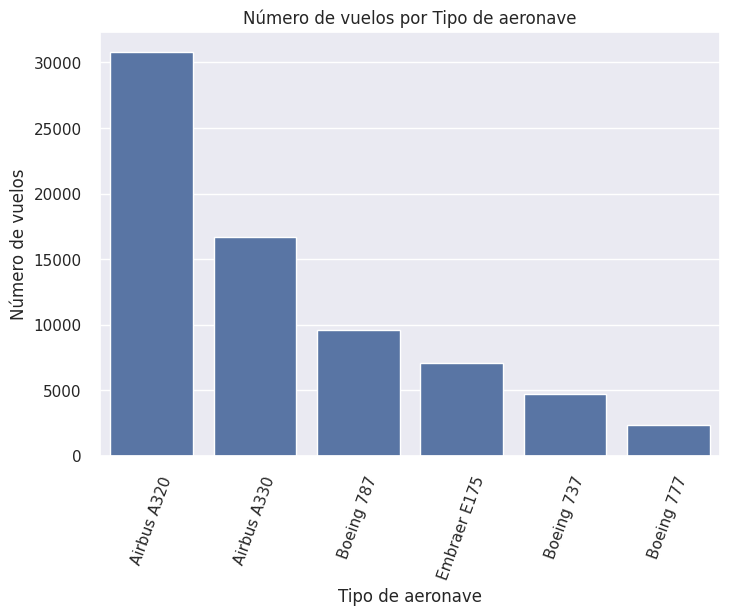

In [197]:
order=datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type',order=order)
plt.title('Número de vuelos por Tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

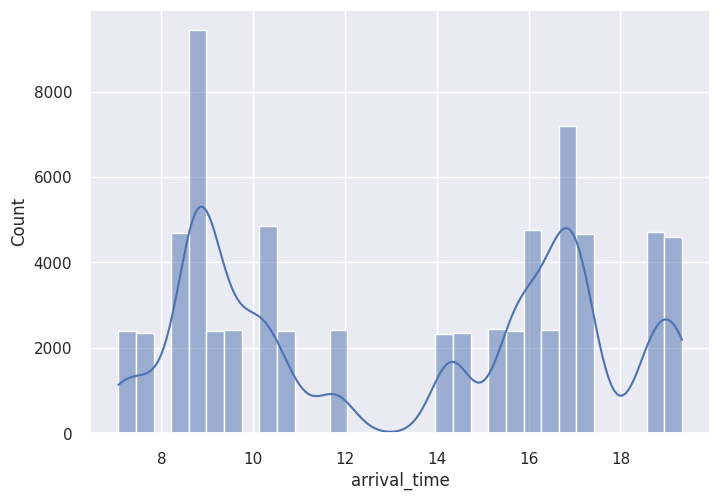

In [198]:
sns.histplot(data=datos, x='arrival_time',kde=True)


https://en.m.wikipedia.org/wiki/Freedman–Diaconis_rule

In [199]:
import numpy as np
def  ancho_bin(df,columna):
  q75,q25=np.percentile(df[columna],[75,25])
  iqr=q75-q25
  ancho= 2 * iqr * np.power(len(df[columna]),-1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

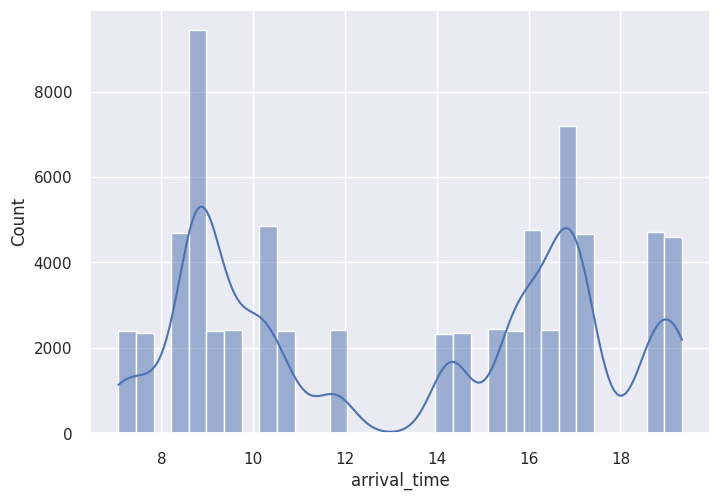

In [200]:
binwith=ancho_bin(datos,'arrival_time')
sns.histplot(data=datos, x='arrival_time',kde=True,binwidth=binwith)

<Axes: xlabel='departure_time', ylabel='Count'>

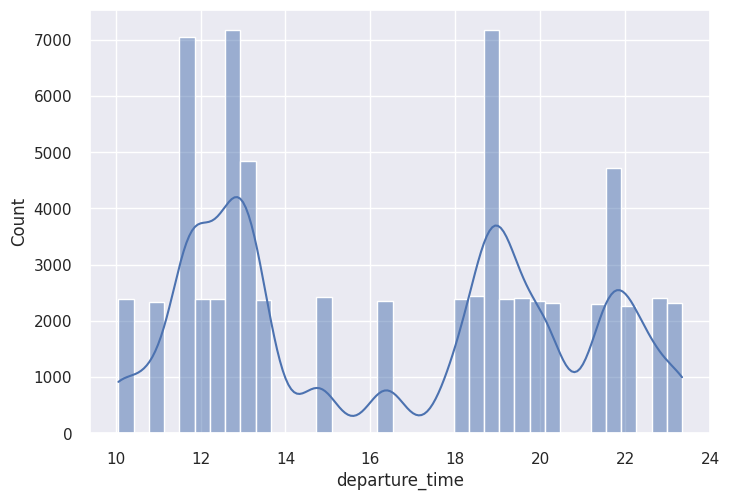

In [201]:
binwith=ancho_bin(datos,'departure_time')
sns.histplot(data=datos, x='departure_time',kde=True,binwidth=binwith)

In [202]:
atraso_promedio=datos['delay'].mean()
atraso_mediana=datos['delay'].median()

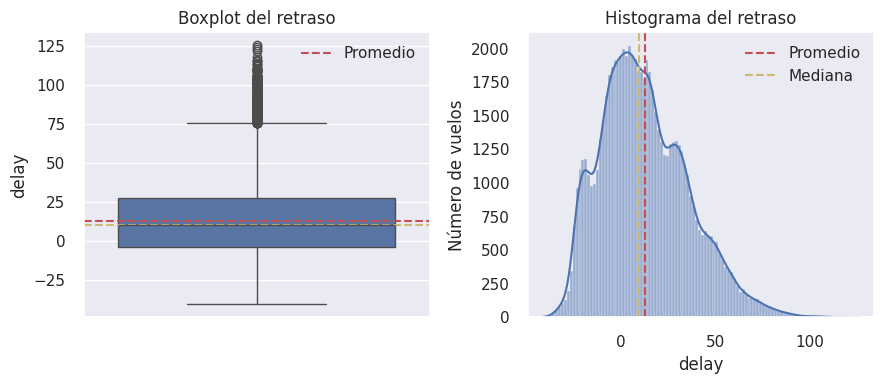

In [203]:
# fig=lienzo ax=ejes
fig, ax=plt.subplots(1,2,figsize=(9,4))
sns.boxplot(data=datos,y='delay',ax=ax[0])
ax[0].set_title('Boxplot del retraso')
ax[0].axhline(y=atraso_promedio,color='r',linestyle='--',label='Promedio')
ax[0].axhline(y=atraso_mediana,color='y',linestyle='--')
ax[0].legend()

binwidth=ancho_bin(datos,'delay')
sns.histplot(data=datos,x='delay',ax=ax[1],kde=True, binwidth=binwidth)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma del retraso')
ax[1].axvline(x=atraso_promedio,color='r',linestyle='--',label='Promedio')
ax[1].axvline(x=atraso_mediana,color='y',linestyle='--',label='Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()

# Clase 2

In [204]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [205]:
datos['Date']=datos['year'].astype(str)+'-'+(datos['day']+1).astype(str)
datos.head()


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,Date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-1
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-1
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-1
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-1
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-1


In [206]:
datos['Date']=pd.to_datetime(datos['Date'],format='%Y-%j')
datos.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,Date
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277,2022-12-31
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348,2022-12-31
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080,2022-12-31
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [207]:
datos['is_weekend']=datos['Date'].dt.weekday.isin([5,6])
datos['day_name']=datos['Date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,Date,is_weekend,day_name
18479,19,MM,Airbus A320,schengen,TZF,16.245220,19.245220,136,2013,False,26.371591,2013-05-17,False,Friday
38831,9,BZ,Airbus A330,non-schengen,TZF,10.733469,12.733469,33,2017,False,-19.908177,2017-02-03,False,Friday
47216,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,227,2018,False,6.214900,2018-08-16,False,Thursday
17389,30,BZ,Embraer E175,schengen,PUA,8.923441,12.923441,64,2013,False,-6.151781,2013-03-06,False,Wednesday
37939,22,YE,Airbus A320,non-schengen,MWL,8.794147,11.794147,339,2016,False,15.282173,2016-12-05,False,Monday


In [208]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  Date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [209]:
import warnings
warnings.filterwarnings('ignore')

In [210]:
datos['schengen']=datos['schengen'].replace({'non-schengen':0,'schengen':1})
datos['is_holiday']=datos['is_holiday'].replace({False:0,True:1})
datos['is_weekend']=datos['is_weekend'].replace({False:0,True:1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,Date,is_weekend,day_name
42834,2,BZ,Airbus A320,1,ZQO,19.196804,22.196804,300,2017,1,59.844454,2017-10-28,1,Saturday
7256,19,MM,Airbus A320,1,TZF,16.245220,19.245220,118,2011,0,45.138766,2011-04-29,0,Friday
43144,24,BZ,Airbus A320,1,FJB,9.668655,12.668655,321,2017,0,20.545073,2017-11-18,1,Saturday


In [211]:
categoricas=['airline','aircraft_type','origin','day_name']
pd.get_dummies(data=datos,columns=categoricas,dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,Date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [212]:
datos_codificados=pd.get_dummies(data=datos,columns=categoricas,dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,Date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
70991,3,1,18.635384,22.635384,352,2022,0,-32.215679,2022-12-19,0,...,0,1,0,0,1,0,0,0,0,0
55308,22,0,8.794147,11.794147,37,2020,0,59.650127,2020-02-07,0,...,0,0,0,1,0,0,0,0,0,0
31339,7,1,8.564949,13.564949,264,2015,0,18.761208,2015-09-22,0,...,0,1,0,0,0,0,0,0,1,0
69833,11,0,10.177197,13.177197,275,2022,0,3.371946,2022-10-03,0,...,0,0,0,0,1,0,0,0,0,0
65756,4,1,11.781391,14.781391,3,2022,0,-21.786929,2022-01-04,0,...,1,0,0,0,0,0,0,0,1,0


In [213]:
datos_codificados[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [214]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   Date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [215]:
df=datos_codificados.drop(columns=['flight_id','departure_time','day','year','Date'])
df.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


# Clase 3

https://scikit-learn.org/stable/

In [216]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
X= df.drop(columns='delay')
y=df['delay']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
baseline=DummyRegressor()
baseline.fit(X_train,y_train)

DummyRegressor()

In [217]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_dummy=baseline.predict(X_test)
def calcular_regresion(y_test,y_pred):
  rmse=mean_squared_error(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  metricas={
      'RMSE':round((rmse)**(1/2),4),
      'MAE':round(mae,4),
      'R2':round(r2,4)
  }
  return metricas


In [218]:
resultado_baseline=calcular_regresion(y_test,y_pred_dummy)
resultado_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

In [219]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regresion(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raíz del Error Cuadrático Medio': round(rmse**(1/2), 4),
        'Error Absoluto Medio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

In [220]:
from sklearn.dummy import DummyRegressor

estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_metricas_regresion(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estrategia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

Estrategia: mean
Raíz del Error Cuadrático Medio: 23.1612
Error Absoluto Medio: 18.5646
R2 Score: -0.0


Estrategia: median
Raíz del Error Cuadrático Medio: 23.3446
Error Absoluto Medio: 18.4452
R2 Score: -0.0159


Estrategia: quantile
Raíz del Error Cuadrático Medio: 28.7554
Error Absoluto Medio: 22.0248
R2 Score: -0.5414


Estrategia: constant
Raíz del Error Cuadrático Medio: 23.3079
Error Absoluto Medio: 18.4449
R2 Score: -0.0127




In [221]:
from sklearn.ensemble import RandomForestRegressor
modelo=RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train,y_train)
ypred=modelo.predict(X_test)
resultado_rf=calcular_regresion(y_test,ypred)
resultado_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

In [222]:
resultado_rf_=calcular_metricas_regresion(y_test,ypred)
resultado_rf_

{'Raíz del Error Cuadrático Medio': 13.7479,
 'Error Absoluto Medio': 11.0262,
 'R2 Score': 0.6477}

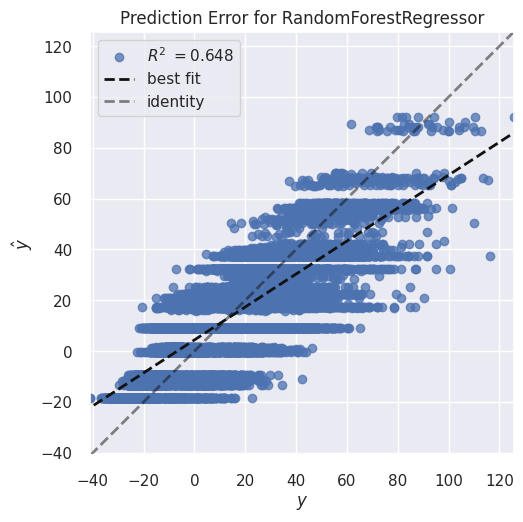

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [223]:
from yellowbrick.regressor import PredictionError
visualizer=PredictionError(modelo)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

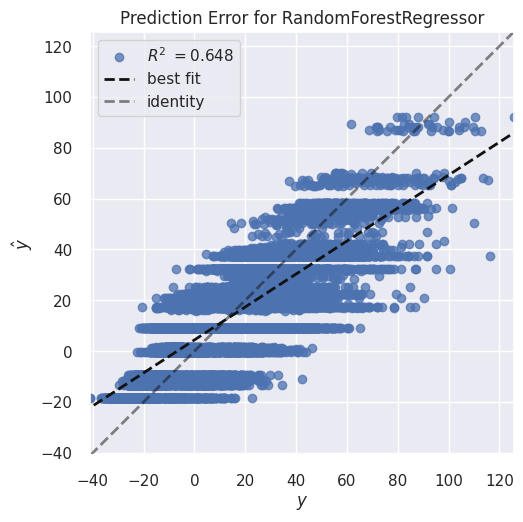

In [224]:
from yellowbrick.regressor import prediction_error
visualizer=prediction_error(modelo, X_train, y_train, X_test, y_test);


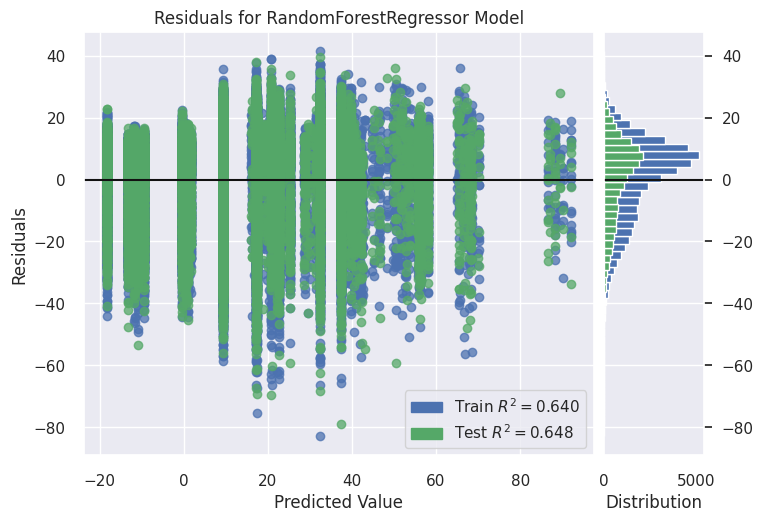

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [225]:
from yellowbrick.regressor import ResidualsPlot
visualizer=ResidualsPlot(modelo)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

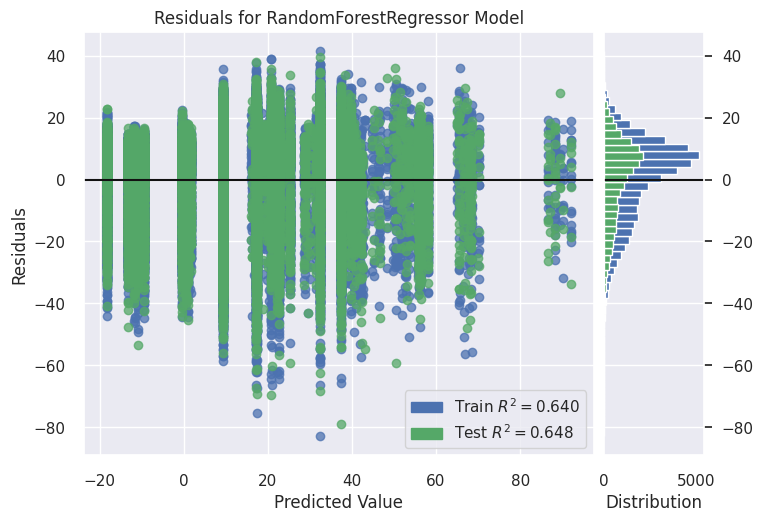

In [226]:
from yellowbrick.regressor import residuals_plot
viz=residuals_plot(modelo, X_train, y_train, X_test, y_test);



In [227]:
from sklearn.model_selection import KFold, cross_validate
scoring={
    'R2':'r2',
    'MAE':'neg_mean_absolute_error',
    'RMSE':'neg_root_mean_squared_error'
}
cv=KFold(n_splits=5,shuffle=True,random_state=42)
cv_results=cross_validate(modelo,X_train,y_train,scoring=scoring,cv=cv)
cv_results

{'fit_time': array([4.5809474 , 3.26208067, 3.22581983, 3.12502909, 4.61533856]),
 'score_time': array([0.10217118, 0.05462074, 0.05556059, 0.05264378, 0.05565691]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528])}

# Clase 4

In [228]:
len (df.columns)

31

In [229]:
modelo.feature_importances_

array([3.39814918e-06, 3.60417588e-02, 1.45895991e-01, 6.10861947e-05,
       5.30319673e-01, 1.36989042e-05, 2.14417900e-05, 1.00746574e-01,
       5.76173558e-02, 5.18974843e-04, 8.83162236e-05, 2.64390542e-02,
       4.58830752e-02, 1.01922847e-04, 1.71891675e-04, 1.59736760e-02,
       3.57450957e-05, 9.21269997e-05, 5.42552087e-04, 1.03212932e-02,
       2.09099647e-02, 6.63707069e-03, 2.64070312e-04, 8.68597522e-04,
       1.00052465e-04, 2.79146627e-05, 7.17673254e-05, 3.72705034e-05,
       1.06499638e-04, 8.71862374e-05])

In [230]:
importances=modelo.feature_importances_

In [231]:
feature_importances = pd.DataFrame({'feature':X.columns,'importance':(importances*100).round(2)}).sort_values('importance',ascending=False)
feature_importances

,feature,importance
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [232]:
# Dataframe con solo los indixex de las métricas que vamos a utilizar
resultados=pd.DataFrame(index=['RMSE','MAE','R2'])
resultados

""
RMSE
MAE
R2


In [233]:
# regresor que vamos a instanciar con c/u de las cantidades de features que vamos a colocar
model_features=RandomForestRegressor(max_depth=5,random_state=42)
model_features


RandomForestRegressor(max_depth=5, random_state=42)

In [234]:
#  list comprehension
[i if i!=0 else 1 for i in range(0,35,5)]

[1, 5, 10, 15, 20, 25, 30]

In [235]:
[i  for i in range(0,35,5)]

[0, 5, 10, 15, 20, 25, 30]

In [236]:
# lista de iteración, que es la cantidad de features
ct_features =[i if i!=0 else 1 for i in range(0,35,5)]
ct_features


[1, 5, 10, 15, 20, 25, 30]

In [237]:
feature_importances['feature'].values[:4]

array(['airline_BZ', 'is_holiday', 'aircraft_type_Airbus A320',
       'aircraft_type_Airbus A330'], dtype=object)

In [238]:
for i in ct_features:
  select_features=feature_importances['feature'].values[:i]
  print(f'\n {select_features}')


 ['airline_BZ']

 ['airline_BZ' 'is_holiday' 'aircraft_type_Airbus A320'
 'aircraft_type_Airbus A330' 'aircraft_type_Embraer E175']

 ['airline_BZ' 'is_holiday' 'aircraft_type_Airbus A320'
 'aircraft_type_Airbus A330' 'aircraft_type_Embraer E175' 'arrival_time'
 'aircraft_type_Boeing 787' 'origin_TCY' 'origin_CSF' 'origin_PUA']

 ['airline_BZ' 'is_holiday' 'aircraft_type_Airbus A320'
 'aircraft_type_Airbus A330' 'aircraft_type_Embraer E175' 'arrival_time'
 'aircraft_type_Boeing 787' 'origin_TCY' 'origin_CSF' 'origin_PUA'
 'origin_TZF' 'day_name_Friday' 'origin_MWL' 'aircraft_type_Boeing 737'
 'origin_ZQO']

 ['airline_BZ' 'is_holiday' 'aircraft_type_Airbus A320'
 'aircraft_type_Airbus A330' 'aircraft_type_Embraer E175' 'arrival_time'
 'aircraft_type_Boeing 787' 'origin_TCY' 'origin_CSF' 'origin_PUA'
 'origin_TZF' 'day_name_Friday' 'origin_MWL' 'aircraft_type_Boeing 737'
 'origin_ZQO' 'origin_CNU' 'day_name_Wednesday' 'origin_FJB'
 'aircraft_type_Boeing 777' 'is_weekend']

 ['airline_B

In [239]:
# R2 = Coeficiente de determinación
for i in ct_features:
  select_features=feature_importances['feature'].values[:i]
  X_train_sel=X_train[select_features]
  X_test_sel=X_test[select_features]
  model_features.fit(X_train_sel,y_train)
  y_pred_sel=model_features.predict(X_test_sel)
  metricas=calcular_metricas_regresion(y_test,y_pred_sel)
  resultados[i]=list(metricas.values())
resultados

,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


In [240]:
# R2 =  R-squared (Coeficiente de determinación), medida estadística que indica la proporción de la variabilidad de la variable dependiente que es explicada por el modelo de regresión.
# RMSE = root mean square error (error cuadratico medio), calcula raíz cuadrada del promedio de las diferencias (diferencias absolutas entre valores predichos y los reales) al cuadrado
# MAE= Mean Absolute Error (error medio absoluto), calcula promedio de las diferencias absolutas entre valores predichos y los reales
resultados=pd.DataFrame(index=['RMSE','MAE','R2'])
model_features=RandomForestRegressor(max_depth=5,random_state=42)
ct_features = range(10,16)
for i in ct_features:
  select_features=feature_importances['feature'].values[:i]
  X_train_sel=X_train[select_features]
  X_test_sel=X_test[select_features]
  model_features.fit(X_train_sel,y_train)
  y_pred_sel=model_features.predict(X_test_sel)
  metricas=calcular_metricas_regresion(y_test,y_pred_sel)
  resultados[i]=list(metricas.values())
resultados

,10,11,12,13,14,15
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


In [241]:
selected_features=feature_importances['feature'].values[:13]
selected_features

array(['airline_BZ', 'is_holiday', 'aircraft_type_Airbus A320',
       'aircraft_type_Airbus A330', 'aircraft_type_Embraer E175',
       'arrival_time', 'aircraft_type_Boeing 787', 'origin_TCY',
       'origin_CSF', 'origin_PUA', 'origin_TZF', 'day_name_Friday',
       'origin_MWL'], dtype=object)

In [242]:
X_selected_features=X[select_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL,aircraft_type_Boeing 737,origin_ZQO
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0,0,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0,0,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0,0,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0,0,1


In [243]:
# Hacemos de nuevo la división, para tener nuestro conjunto de datos de entrenamiento y prueba con los 13 features o atributos más importantes del modelo
X_train,X_test,y_train,y_test=train_test_split(X_selected_features,y,random_state=42)


In [244]:
# ajustar los hiperparámetros (n_estimators, max_depth, etc)
# parametros para ver cual es el mejor estimador
param_grid ={
    'max_depth':[5,10,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,4,6],
    'n_estimators':[100,150,200]
}

# Para calcular cuántas veces se entrena y evalúa el algoritmo, multiplicamos el número de combinaciones únicas de hiperparámetros por el
# número de pliegues en la validación cruzada. Hay 3 opciones para 'max_depth', 3 para 'min_samples_leaf', 3 para 'min_samples_split' y 3
# para 'n_estimators'. Por lo tanto, el número total de combinaciones únicas de hiperparámetros es 3 * 3 * 3 * 3 = 81. Como estamos usando
# validación cruzada de 3 pliegues, cada conjunto de hiperparámetros será entrenado y evaluado 3 veces. Por lo tanto, el algoritmo será
# entrenado y evaluado 81 * 3 = 243 veces en total.

In [ ]:
from sklearn.model_selection import GridSearchCV

# CV cross validation (validación cruzada)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# estimador con estado de aleatoriedad de 42, param grid, scoring por ahora solo coeficiente de determinación R2, validación cruzada =cv
model_grid=GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                         param_grid=param_grid,
                         scoring='r2',
                         cv=cv)
model_grid.fit(X_train,y_train)

In [ ]:
model_grid.best_params_

In [ ]:
y_pred_grid=model_grid.predict(X_test)
metricas_model_grid=calcular_regresion(y_test,y_pred_grid)
metricas_model_grid

In [ ]:
resultados['modelo_grid']=list(metricas_model_grid.values())
resultados

In [ ]:
#nuestro modelo con estos parametros con todo este tratamiento que se realizo quedo mucho mejor
#- Menor error (RMSE y MAE) → más exactitud.
#- Mayor capacidad explicativa (R²) → mejor ajuste.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Valores del hiperparámetro
param_range = [10, 11, 12, 13, 14, 15]

# Métricas originales
rmse_vals = [13.7587, 13.7564, 13.7526, 13.7526, 13.7497, 13.7497]
mae_vals = [11.0422, 11.0425, 11.0312, 11.0314, 11.0285, 11.0285]
r2_vals = [0.6471, 0.6472, 0.6474, 0.6474, 0.6476, 0.6476]

# Valores del modelo ajustado
rmse_grid = 13.2310
mae_grid = 10.6296
r2_grid = 0.6754

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# RMSE
plt.plot(param_range, rmse_vals, marker='o', label='RMSE original')
plt.axhline(y=rmse_grid, color='r', linestyle='--', label='RMSE modelo ajustado')

# MAE
plt.plot(param_range, mae_vals, marker='s', label='MAE original')
plt.axhline(y=mae_grid, color='g', linestyle='--', label='MAE modelo ajustado')

# R2
plt.plot(param_range, r2_vals, marker='^', label='R² original')
plt.axhline(y=r2_grid, color='b', linestyle='--', label='R² modelo ajustado')

plt.title('Comparación de Métricas vs. Modelo Ajustado')
plt.xlabel('Valor del hiperparámetro')
plt.ylabel('Métrica')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import  pickle
try:
  with open('champions.pkl','wb') as file:
    pickle.dump(model_grid.best_estimator_,file)
    print('Modelo guardado con exito')
except Exception as e:
  print('Error al guardar el modelo',str(e))


# Utilizando modelo guardado

In [ ]:
# 3 - Carga el modelo guardado utilizando la función pickle.load():
# El parámetro 'rb' en el método open() de Python significa "read binary" (leer binario).
# Después de esto, el modelo está cargado y guardado en la variable model.

file_path='/content/champions.pkl'

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("¡Modelo cargado con éxito!")
except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))

In [ ]:
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Donde los valores corresponden a:

schengen: 0
arrival_time: 10.8941

is_holiday: 0

is_weekend: 0

airline_BZ: 0

airline_MM: 0

airline_YE: 1

aircraft_type_Airbus A320: 1

aircraft_type_Airbus A330: 0

aircraft_type_Boeing 737: 0

aircraft_type_Boeing 777: 0

aircraft_type_Boeing 787: 0

aircraft_type_Embraer E175: 0

In [ ]:
# 4 - Ahora puedes usar el modelo cargado para hacer predicciones con los nuevos datos. Asegúrate de que los datos de entrada estén en el formato
# esperado por el modelo.
# Ejemplo de predicción con datos de entrada 'X'

model.predict([nueva_muestra])[0]